In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [11]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [12]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.7808 - val_loss: 0.4717 - val_accuracy: 0.8044
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8139 - val_loss: 0.4301 - val_accuracy: 0.8144
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8223 - val_loss: 0.4099 - val_accuracy: 0.8231
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8263 - val_loss: 0.4012 - val_accuracy: 0.8244
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8331 - val_loss: 0.3920 - val_accuracy: 0.8331
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8377 - val_loss: 0.3844 - val_accuracy: 0.8375
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8444 - val_loss: 0.3773 - val_accuracy: 0.8406

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8648 - val_loss: 0.3468 - val_accuracy: 0.8487
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8672 - val_loss: 0.3474 - val_accuracy: 0.8481
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8670 - val_loss: 0.3467 - val_accuracy: 0.8494
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8670 - val_loss: 0.3473 - val_accuracy: 0.8506
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8659 - val_loss: 0.3473 - val_accuracy: 0.8487
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8655 - val_loss: 0.3502 - val_accuracy: 0.8469
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8655 - val_loss: 0.3465 - val_accuracy:

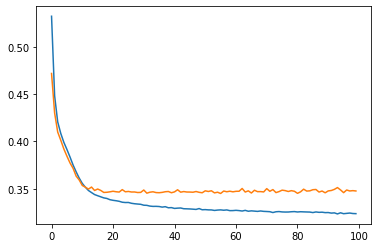

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

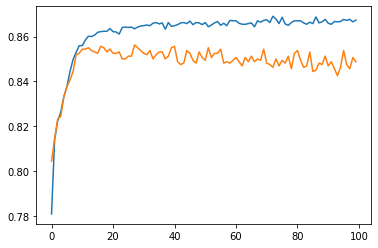

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
model.layers[0].get_weights()

[array([[-1.03910595e-01,  3.38720798e-01, -3.36979210e-01,
          2.89077938e-01, -9.52673033e-02, -6.09769374e-02,
          2.32183203e-01,  5.25967598e-01,  7.24507570e-01,
         -1.39911696e-01,  2.42669865e-01],
        [ 2.89938956e-01, -1.24942231e+00,  8.57879519e-01,
          1.11542881e+00, -8.03435028e-01,  2.29317993e-01,
          4.02331381e-04,  3.03367674e-01,  1.25075966e-01,
         -2.33816296e-01,  3.12402308e-01],
        [ 6.72017559e-02, -7.46286288e-03,  1.12760983e-01,
          3.65158528e-01,  1.09240055e-01, -4.96034846e-02,
          2.66345143e-01,  3.64303924e-02, -1.70659676e-01,
         -3.00454170e-01, -4.86472063e-03],
        [ 2.77358532e-01, -3.90176564e-01, -3.02927703e-01,
         -3.43606830e-01, -1.19594827e-01, -3.84659111e-01,
         -2.94627279e-01,  7.05024153e-02, -3.00538301e-01,
         -4.66529340e-01, -5.70987053e-02],
        [ 1.04656637e+00,  3.05427581e-01, -1.54849499e-01,
         -7.54085839e-01,  8.76480266e-02, -

In [25]:
model.layers[1].get_weights()

[array([[ 1.0327994 , -0.7104995 ,  0.67567533, -0.30329797, -0.446026  ,
          0.28759855,  0.4229568 , -0.32016596, -0.04211983, -0.27784836,
         -0.45387065],
        [ 0.4070527 ,  0.60954267,  0.01977208,  0.1479347 ,  0.41724688,
         -0.09650192, -0.71156937,  0.5854714 , -0.48356685, -0.20713145,
         -0.4110022 ],
        [-0.4298395 ,  0.0373476 , -0.5354488 ,  0.3423392 ,  0.78095275,
         -0.8456279 , -0.00264208, -0.38343298, -0.02707332, -0.19216909,
         -0.30755213],
        [-0.4314902 ,  0.24670017,  0.38903046,  0.40270665,  0.5645705 ,
         -0.35119233, -0.15450948, -0.45620686,  0.10252577, -0.64676315,
         -0.39578572],
        [-0.46118984,  0.11111375,  0.4016107 ,  0.05585399,  0.29195324,
         -0.10640755, -0.8747852 , -0.599278  ,  0.6451656 ,  0.28816658,
          0.3949574 ],
        [-0.61664546,  0.3662648 ,  0.3480341 , -0.19856656, -0.6130968 ,
          0.14807135,  0.7661409 ,  0.6509133 , -0.19150467,  0.0577642

In [26]:
model.layers[2].get_weights()

[array([[ 0.90330154],
        [ 0.592022  ],
        [ 0.7803209 ],
        [-0.29865822],
        [-0.8866171 ],
        [-0.4281158 ],
        [ 1.2630274 ],
        [-0.74448323],
        [-0.47355533],
        [-1.0120578 ],
        [-0.7232084 ]], dtype=float32),
 array([-0.09429701], dtype=float32)]

In [27]:
y_log = model.predict(X_test_scaled)
y_log

array([[0.02821139],
       [0.04726753],
       [0.03699812],
       ...,
       [0.01450616],
       [0.01938191],
       [0.31516454]], dtype=float32)

In [28]:
y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.864